# NumPy

NumPy is a Python library used for working with arrays.
It provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
NumPy is a fundamental package for scientific computing with Python and is widely used in the field of data science.

NumPy is particularly well-suited for numerical computations, as it provides an array object that is up to 50x faster than traditional Python lists.
The array object in NumPy is called ndarray, and it provides a lot of supporting functions that make working with ndarray very easy.
Arrays are very frequently used in data science, where speed and resources are very important.

One of the most important features of NumPy is its ability to perform element-wise operations on arrays.
This means that you can perform mathematical operations on entire arrays at once, without having to loop over each element of the array.
NumPy also provides support for linear algebra, Fourier transforms, and other advanced mathematical functions, making it a powerful tool for scientific computing.

Key resources:

-   [NumPy documentation](https://numpy.org/doc/stable)
-   [NumPy learn](https://numpy.org/learn/)
-   [Real Python](https://realpython.com/numpy-tutorial/)
-   [Scientific Python Lectures](https://lectures.scientific-python.org/intro/numpy/index.html)

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p style="padding-top: 1em">
        There are some cells that I am intentionally hiding the code.
        This is to ensure you are able to pay attention to the key parts.
        If you ever see data where you cannot see where I got it from, that part is probably hidden.
    </p>
</div>


## Lists

A one-dimensional array is a fundamental data structure in programming that represents a collection of elements stored in a linear sequence.
Each element in the array is identified by an index, starting from 0 for the first element.
This sounds a lot like a list (and it is).

Let's start by creating a simple list of `int` values.

In [1]:
data_list = [0, 1, 2, 3, 4, 5]
print(data_list)
print(type(data_list))

[0, 1, 2, 3, 4, 5]
<class 'list'>


We can create something very similar in [NumPy](https://numpy.org/doc/stable) called an [array](https://numpy.org/doc/stable/user/basics.creation.html).

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p style="padding-top: 1em">
        Note that other programming languages use the term "array" or "vector" for the equivalent data structure of a Python list.
        Whenever we are talking about Python, we will often say "array" to mean specifically a NumPy array.
        If you are ever confused, always ask to clarify if we mean a NumPy array.
    </p>
</div>

Okay, back to creating our Numpy array.

In [2]:
import numpy as np

data_array = np.array([0, 1, 2, 3, 4, 5])
print(data_array)
print(type(data_array))

[0 1 2 3 4 5]
<class 'numpy.ndarray'>


`data_array` contains the same information (`int`s from 0 to 5) with some major usability differences.
First, we notice that there are no commas in between the elements when we print the array; this is mainly just for aesthetic purposes and you *could* tell NumPy to print them.
We also check that, indeed, the data type is not a `list`, but a `numpy.ndarray`.

Let's do some numerical operations with our two data structures and see the differences.
First, let's just add `2` to each element.

For a list we need to create a new list and then [loop](../../python-basics/loops) over each element, add `2`, and then `append` it to `list_added`.

In [3]:
list_added = []
for num in data_list:
    list_added.append(num + 2)
print(f"List:  {list_added}")

List:  [2, 3, 4, 5, 6, 7]


Another way you could do this is with a list comprehension.
This is essentially a shortcut to do the code in the above cell.

In [4]:
list_added = [i + 2 for i in data_list]
print(f"List:  {list_added}")

List:  [2, 3, 4, 5, 6, 7]


For a NumPy array, we do this.

In [5]:
array_added = data_array + 2
print(f"Array: {array_added}")

Array: [2 3 4 5 6 7]


Wow, that was easy.
And indeed, NumPy is designed to be the de facto [library](../../python-basics/libraries) for numerical operations.

What about a sum?

In [6]:
list_sum = sum(data_list)
print(f"List:  {list_sum}")

List:  15


Okay, not too bad.

In [7]:
array_sum = np.sum(data_array)
print(f"Array: {array_sum}")

Array: 15


There was not much of a difference there.

What about computing the mean?

In [8]:
list_mean = sum(data_list) / len(data_list)
print(f"List:  {list_mean}")

array_mean = np.mean(data_array)
print(f"Array: {array_mean}")

List:  2.5
Array: 2.5


Alright, that does not seem like too big of a difference.
What gives?

NumPy accelerates mathematical routines compared to lists.
For example, we can use [`timeit`](https://docs.python.org/3/library/timeit.html) to compute the average time for small snippets of code.
Let's see how much faster NumPy is for simply computing $x^{2}$.

First, we will create an array and list of random numbers from 0 to 1000.

In [9]:
random_array = np.random.uniform(low=0, high=1000, size=10000)
print(random_array)
random_list = random_array.tolist()

[840.02203123 390.43466132 943.92266283 ... 915.78585778 895.96633058
 646.51616033]


Now, let's time the calculation.

In [10]:
import timeit

# Time the operation of squaring elements for NumPy array
numpy_time = timeit.timeit(lambda: np.square(random_array), number=10000)

# Time the operation of squaring elements for Python list
list_time = timeit.timeit(lambda: [x**2 for x in random_list], number=10000)

print(f"NumPy array time: {numpy_time:.3f} s")
print(f"Python list time: {list_time:.3f} s")
print(f"\nNumPy array is {list_time/numpy_time:.2f} times faster than Python list!")

NumPy array time: 0.025 s
Python list time: 3.787 s

NumPy array is 151.52 times faster than Python list!


## List of lists

The real selling point for NumPy is the concept of multi-dimensional arrays which are important in ~~computational biology~~ everything.

For out example, suppose we have a data set of different patient vital signs like `pulse`, `temperature`, and `spo2`.
We could potentially have thousands, but let's stick with only three patients.

While we have not covered it yet, you can actually store a list inside of a list!

In [11]:
patient_data_list = [[57, 99.0, 0.98], [68, 101.2, 0.92], [60, 98.3, 1.00]]
print("List")
print(patient_data_list)

List
[[57, 99.0, 0.98], [68, 101.2, 0.92], [60, 98.3, 1.0]]


In [12]:
patient_data_array = np.array([[57, 99.0, 0.98], [68, 101.2, 0.92], [60, 98.3, 1.00]])
print("Array")
print(patient_data_array)

Array
[[ 57.    99.     0.98]
 [ 68.   101.2    0.92]
 [ 60.    98.3    1.  ]]


We can also use `patient_data_list` to create the array!

In [13]:
patient_data_array = np.array(patient_data_list)
print("Array")
print(patient_data_array)

Array
[[ 57.    99.     0.98]
 [ 68.   101.2    0.92]
 [ 60.    98.3    1.  ]]


Okay, now lets compute the mean of each data category (i.e., column).

In [14]:
# First, we create a list to store our means.
n_patients = len(patient_data_list)  # total number of rows/patients we have
print(n_patients)
patient_data_mean_list = [0.0] * n_patients  # Creates list with zeros for each mean
print(patient_data_mean_list)

3
[0.0, 0.0, 0.0]


Now we have our collection where we can store intermediate values while computing the mean.

To compute the mean, we first need to compute the sum for each element `i` in each list.
Looping over each `patient_data` in `patient_data_list` would get us the data for each patient.
Then, I can iterate over the `pulse`, `temperature`, and `spo2` and add this value to our `patient_data_mean_list`.

After this, we need to normalize the sum by the total number of samples.

In [15]:
# Repeat this line to ensure we always start from zero in this cell.
patient_data_mean_list = [0.0] * n_patients

# Loops through each patient's data
for patient_data in patient_data_list:
    # Generates an index for and adds the value of patient data to the current
    # value in patient_data_mean_list
    for i in range(len(patient_data)):
        patient_data_mean_list[i] = patient_data_mean_list[i] + patient_data[i]

# Generates an index to loop over every sum in patient_data_mean_list
for i in range(len(patient_data_mean_list)):
    # Divides each sum by the number of patients to get the mean
    patient_data_mean_list[i] = patient_data_mean_list[i] / n_patients

print(patient_data_mean_list)

[61.666666666666664, 99.5, 0.9666666666666667]


In [16]:
patient_data_mean_array = np.mean(
    patient_data_array, axis=0
)  # axis must equal zero here.
print(f"Array: {patient_data_mean_array}")

Array: [61.66666667 99.5         0.96666667]


That was much easier!
But what was that `axis` parameter?

Great question, however, to answer that we need to explain some fundamental NumPy array concepts.

## ndarray

A [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) is a fundamental concept in the NumPy library, serving as a powerful tool for organizing data.
Picture it as a grid, like an image or chessboard, where each square contains a specific number or piece of information.
For example, we can look at a cute image of a racoon (i.e., trash panda) in gray scale.

Note that our origin `(0, 0)` **is not** at the bottom left like we are used to in graphs.
We will go more in detail later.

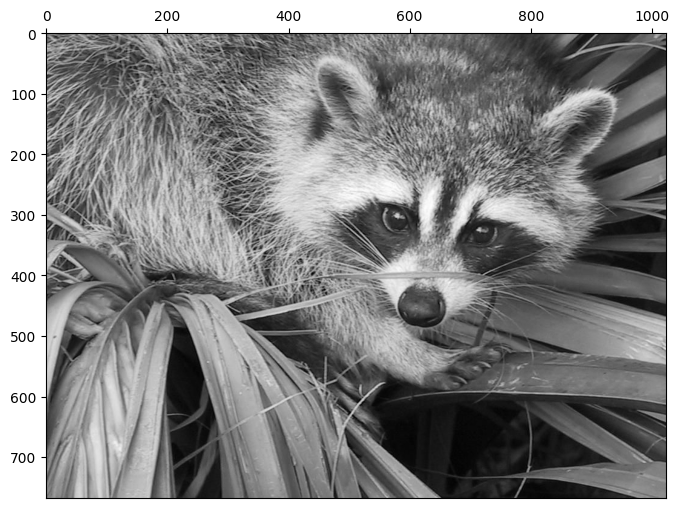

In [17]:
# @title

###   IGNORE THIS CODE   ###
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "https://scipy-lectures.org/_images/face.png"

# Download the image from the URL
response = requests.get(image_url)
img_data = BytesIO(response.content)

# Open the image using PIL
image = Image.open(img_data)

# Convert the image to grayscale
gray_image = image.convert("L")
image = np.array(gray_image)

# Plot the grayscale image using Matplotlib
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
ax.imshow(image, cmap="gray")
plt.tick_params(axis="x", labeltop=True, labelbottom=False, top=True, bottom=False)
plt.show()

This image is actually just a NumPy array!
Each value is how bright that pixel is&mdash;a value of 0 is black and 255 is white.

In [18]:
print(image)

[[117 134 149 ... 118 128 136]
 [ 86 107 127 ... 117 133 145]
 [ 70  91 112 ... 117 133 144]
 ...
 [ 97 102 115 ... 140 139 139]
 [ 93 103 119 ... 139 138 138]
 [ 93 105 118 ... 138 137 136]]


For example, let's look get a closer look at our furry friend.

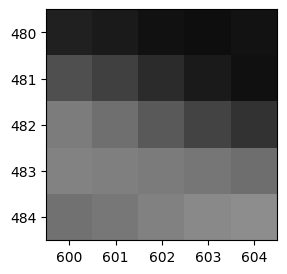

In [19]:
# @title

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 3))
ax.imshow(image, cmap="gray")
ax.set_xlim(600 - 0.5, 605 - 0.5)  # X-axis range
ax.set_ylim(480 - 0.5, 485 - 0.5)  # Y-axis range
plt.gca().invert_yaxis()  # Invert the y-axis to put it on top
plt.show()

We see darker pixels at the top right (i.e., low values) and lighter pixels (i.e., higher values) in the bottom right.

Now, let's print the array of this 5x5 array.

In [20]:
# @title

print(image[480:485, 600:605])  # Y-axis range, X-axis range

[[ 33  26  17  14  18]
 [ 79  64  43  26  16]
 [123 110  88  67  50]
 [129 126 122 117 109]
 [112 118 128 136 140]]


We indeed do see lower values in the top right near index `[480, 604]` and higher values in the bottom left near index `[484, 600]`.
As you can see, ndarray just holds data for us just like a massive Excel file with a bunch of numbers.

You know how videos are around 60 images displayed per second?
Well, we can stack these images together in NumPy to get a 3D array.

In [21]:
import io
from urllib import request

NPY_PATH = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/npy/steamboat-willie.npy"

response = request.urlopen(NPY_PATH)
content = response.read()

# Load the .npy file
public_domain_willie = np.load(io.BytesIO(content))

Let's print a row of this mystery film.

In [22]:
print(public_domain_willie[34, 24])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  11  67 107 123 122 121 121 121 121 122 123
 123 123 123 123 123 123 123 123 123 123 124 124 124 125 125 125 125 125
 125 125 125 125 125 125 125 125 125 126 126 126 128 129 129 129 129 130
 130 130 131 131 132 132 132 132 132 131 131 131 131 131 131 131 131 131
 131 131 131 131 131 132 132 132 133 133 133 135 135 135 136 136 136 137
 137 137 137 137 136 136 136 136 136 136 136 136 136 135 135 135 135 135
 133 132 132 131 130 129 130 130 130 130 130 130 130 130 129 129 128 128
 128 128 129 128 128 128 128 129 119  98  87  98 117 119 117 116 112 109
 104  96  89  83  78  74  72  69  67  66  65  68  71  76  81  88  96  93
  75  66  64  79 103 114 117 118 118 117 118 121 122 124 126 128 128 129
 130 132 133 135 136 137 137 137 138 138 137 137 137 138 138 138 138 139
 139 139 139 139 139 139 139 139 140 140 140 140 140 140 140 140 140 140
 140 140 140 142 142 143 142 142 142 144 144 142 14

Yes, that makes sense ... right?
This is just one row of pixels and I cannot get much information out of it.
Let's just display the frames one after another.
This following code is not web friendly, so I rendered this animation using the code below and saved as a gif.

![](https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/npy/steamboat-willie.gif)

This is public domain, Disney!

<details><summary>Code</summary>

```python
from matplotlib.animation import FuncAnimation

frames = public_domain_willie.shape[0]

# Set up the plot
fig, ax = plt.subplots()
img = ax.imshow(public_domain_willie[0], cmap='gray')
ax.set_title('Frame 1/{}'.format(frames))

# Update function for the animation
def update(frame):
    img.set_array(public_domain_willie[frame])
    ax.set_title('Frame {}/{}'.format(frame + 1, frames))
    return img,

# Create the animation
animation = FuncAnimation(fig, update, frames=frames, interval=30, blit=True)

animation.save('animation.gif', writer='imagemagick', fps=30)
```
</details>

### Data types

[ndarray.dtype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html): the data type of an array.

One crucial difference in ndarray versus lists is that a ndarray can only contain one data type.
Elements must be all floats, ints, strings, bools, etc.
This is because NumPy is heavily focused on performance, and enforcing this rule let's them design blazing fast algorithms.


In [23]:
print(image.dtype)

uint8


Each value in our image is an unsigned integer with 8 bytes; meaning it allows values from 0 to 255.

What are all of the other data types?

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p style="padding-top: 1em">
        All of these data types are attributes of NumPy.
        For example, to use <code>int8</code> you could specify "int8" as <code>dtype</code> or <code>np.int8</code>.
    </p>
</div>

#### Integers

| Type | Alias | Description |
| ---- | ----- | ----------- |
| `int8` | `i1` | An 8-bit signed integer whose values exist on the interval `[-128, +127]`. |
| `int16` | `i2` | A 16-bit signed integer whose values exist on the interval `[−32,767, +32,767]`. |
| `int32` | `i4` | A 32-bit signed integer whose values exist on the interval `[−2,147,483,647, +2,147,483,647]`. |
| `int64` | `i8` | A 64-bit signed integer whose values exist on the interval `[−9,223,372,036,854,775,807, +9,223,372,036,854,775,807]`. |

| Type | Alias | Description |
| ---- | ----- | ----------- |
| `uint8` | `u1` | An 8-bit unsigned integer whose values exist on the interval `[0, +255]`. |
| `uint16` | `u2` | A 16-bit unsigned integer whose values exist on the interval `[0, +65,535]`. |
| `uint32` | `u4` | A 32-bit unsigned integer whose values exist on the interval `[0, +4,294,967,295]`. |
| `uint64` | `u8` | A 64-bit unsigned integer whose values exist on the interval `[0, +18,446,744,073,709,551,615]`. |



#### Floats

We almost always use `float64`.

| Type | Alias | Description | Min > 0 | Max > 0 |
| ---- | ----- | ----------- | ------- | ------- |
| `float32` | `f4` | IEEE 754 single-precision binary floating-point number. | 1.18 ⨉ 10<sup>-38</sup> | 3.40 ⨉ 10<sup>38</sup> |
| `float64` | `f8` | IEEE 754 double-precision binary floating-point number. | 2.23 ⨉ 10<sup>-308</sup> | 1.80 ⨉ 10<sup>308</sup> |

The table below shows the absolute precision for both formats over a range of values given by

$$
\text{precision} = \frac{\text{value}}{2^{n}};
$$

where $n$ is the number of mantissa bits which is 23 for `float32` and 52 for `float64`.
This can be used to select an appropriate format given the expected value of a number and the required precision.

| Value | `float32` precision | `float64` precision |
| ----- | ------------------- | --------------- |
|  **10<sup>-12</sup>** | 10<sup>-19</sup> | 10<sup>-28</sup> |
|  **10<sup>-9</sup>** | 10<sup>-16</sup> | 10<sup>-25</sup> |
|  **10<sup>-6</sup>** | 10<sup>-13</sup> | 10<sup>-22</sup> |
|  **10<sup>-3</sup>** | 10<sup>-10</sup> | 10<sup>-19</sup> |
|  **10<sup>0</sup>** | 10<sup>-7</sup> | 10<sup>-16</sup> |
|  **10<sup>3</sup>** | 10<sup>-4</sup> | 10<sup>-13</sup> |
|  **10<sup>6</sup>** | 10<sup>-1</sup> | 10<sup>-10</sup> |
|  **10<sup>9</sup>** | 10<sup>2</sup> | 10<sup>-7</sup> |
|  **10<sup>12</sup>** | 10<sup>5</sup> | 10<sup>-4</sup> |

If you are primarily focused on speed, then check to see if the amount of precision loss is negligible.



#### Text

We generally use Unicode with type `utf8`.

#### Boolean

Type `bool` is used for `True` (`1`) and `False` (`0`).

### Dimensions

[ndarray.ndim](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ndim.htm): the number of axes (dimensions) of the array.

#### 1

One-dimensional arrays are for data in a sequence.
Many of these examples contain a single sample of the data, where you would have many samples in real-world data.

**Genomic sequences**: DNA, RNA, or protein sequences can be represented as arrays of characters or numerical codes.
```python
np.array(['A', 'C', 'G', 'T', 'A', 'T', 'C', 'G'])
```

**Gene expression levels**: Quantitative measurements of gene expression across different samples.

```python
np.array([23.5, 30.2, 18.8, 40.1, 15.6])
```

**Amino acid properties**: Numeric data representing properties of amino acids in protein structures.

```python
np.array([135.5, 72.3, 18.9, 55.6])
```

**Signal intensity**: Experimental data such as microarray or sequencing signal intensities.

```python
np.array([120, 90, 150, 200, 180])
```

**Phylogenetic trees**: Hierarchical relationships among species or genes.

```python
np.array([0.2, 0.5, 0.8, 1.2])
```

**Molecular weights**: Mass spectrometry data, including molecular weights of biomolecules.

```python
np.array([150.3, 200.5, 180.8, 220.1, 195.4])
```

**Time-series**: Temporal data related to biological processes or experimental measurements.

```python
np.array([25.6, 30.2, 28.8, 32.1, 29.6])
```

**Population genetics**: Allele frequencies, genetic diversity, or other population genetics metrics.

```python
np.array([0.3, 0.5, 0.2, 0.4, 0.6])
```

**Sequence alignments**: Results of sequence alignment algorithms, such as scores or identity percentages.

```python
np.array([80, 95, 88, 92, 78])
```


#### 2

2D NumPy arrays are often used to represent data that involves multiple dimensions or attributes.

**Gene Expression Matrix**: Each row represents a gene, and each column represents a sample.
The values in the matrix are the expression levels of genes across different samples.

```python
np.array([
    # Sample 0, Sample 1, Sample 2, Sample 3
    [23.5, 30.2, 18.8, 40.1, 15.6],  # Gene 0
    [15.2, 22.0, 19.5, 35.8, 28.1],  # Gene 1
    [30.0, 28.5, 32.2, 25.9, 21.4]  # Gene 2
])
```

**Genomic Variants Matrix**: Each row represents a genomic position, and each column represents an individual.
The values indicate the presence (1) or absence (0) of a variant.

```python
np.array([
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 1, 1, 0]
])
```

**Protein Structure Coordinates**: Each row represents an amino acid, and each column represents the coordinates (x, y, z) of that amino acid in a protein structure.

```python
np.array([
    [12.3, 8.5, 20.1],
    [15.0, 9.2, 18.8],
    [18.5, 11.3, 22.0]
])
```

**Population Genetics Data Matrix**: Each row represents an individual, and each column represents a genetic marker.
The values are the allele frequencies for each marker in each individual.

```python
np.array([
    [0.3, 0.5, 0.2, 0.4, 0.6],
    [0.2, 0.4, 0.1, 0.3, 0.7],
    [0.5, 0.6, 0.3, 0.2, 0.4]
])
```

**Sequence Alignment Scores Matrix**: Each row and column represent sequences, and the values are the alignment scores between pairs of sequences.

```python
np.array([
    [80, 95, 88, 92, 78],
    [75, 85, 90, 89, 82],
    [85, 88, 92, 91, 80]
])
```


#### 3

**Molecular Structures:**
Protein structures: 3D coordinates of atoms in a protein.
DNA or RNA structures: Helical structures and positions of nucleotides.
Small molecule structures: 3D coordinates of atoms in chemical compounds.

**Medical Imaging:**
MRI scans: Voxel-based representation of tissues in three dimensions.
CT scans: 3D arrays of X-ray attenuation coefficients for different tissues.

**Genomic Data:**
3D arrays can be used to represent genomic data, where each axis may represent different genomic features (e.g., chromosomes, genes, and samples).

**Spatial Transcriptomics:**
Gene expression data with spatial information, representing expression levels across a spatial grid.

**Molecular Dynamics Simulations:**
Simulation data of biomolecular systems, where each dimension represents different spatial coordinates and time steps.

**Electron Microscopy Data:**
High-resolution imaging data of cellular structures, represented as a 3D array.

**Proteomics:**
Mass spectrometry data where one dimension represents different mass-to-charge ratios, another dimension represents retention time, and the third dimension represents intensity.

**Phylogenetic Data:**
Evolutionary relationships represented in 3D space, considering species, traits, and time.

This means we have an `x` and `y` axis.

### Shape

[ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html): the dimensions of the array.
This is a tuple of integers indicating the size of the array in each dimension.
For a matrix with `n` rows and `m` columns, shape will be `(n, m)`.
The length of the shape tuple is therefore the number of axes, `ndim`.

The shape of a NumPy array is a `tuple` that describes the size of each dimension of the array.
It provides information about the number of elements along each axis.

![](https://i.stack.imgur.com/NWTQH.png)

In [24]:
print(image.shape)

(768, 1024)


This means our image has 768 rows (i.e., pixels in the `y` direction) and 1024 columns (i.e., pixels in the `x` direction).

## Creating arrays

### [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

Creates an array with evenly spaced values over a specified range.


In [25]:
linspace_array = np.linspace(0, 1, 5)
print(linspace_array)

[0.   0.25 0.5  0.75 1.  ]


### [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

Creates an array with regularly spaced values within a given interval.


In [26]:
arange_array = np.arange(10)
print(arange_array)

[0 1 2 3 4 5 6 7 8 9]


### [`np.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

Creates an array filled with zeros.


In [27]:
zeros_array = np.zeros(5)
print(zeros_array)

[0. 0. 0. 0. 0.]


### [`np.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html)

Return a new array of given shape and type, filled with fill_value.


In [28]:
full_array = np.full((2, 2), np.nan)
print(full_array)

[[nan nan]
 [nan nan]]


## Indexing and slicing

In Python, the colon `:` is used for [slicing](https://numpy.org/doc/stable/user/basics.indexing.html) in sequences, such as strings, lists, and NumPy arrays.
The syntax for slicing is generally `start:stop:step`.
Here's an explanation of each part:

-   `start`: The index at which the slice begins (inclusive). If omitted, it defaults to the beginning of the sequence.
-   `stop`: The index at which the slice ends (exclusive). If omitted, it defaults to the end of the sequence.
-   `step`: The step size or the number of indices between each slice. If omitted, it defaults to 1.


![](https://lectures.scientific-python.org/_images/numpy_indexing.png)

In [29]:
array = np.array(
    [
        [0, 1, 2, 3, 4, 5],
        [10, 11, 12, 13, 14, 15],
        [20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55],
    ]
)
print(array)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [30]:
array[0]

array([0, 1, 2, 3, 4, 5])

In [31]:
array[0, 3:5]

array([3, 4])

In [32]:
array[4:, 4:]

array([[44, 45],
       [54, 55]])

In [33]:
array[:, 2]

array([ 2, 12, 22, 32, 42, 52])

In [34]:
array[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

Another way to think about slicing is by specifying coordinates in the array.
The intuition behind NumPy slicing as coordinates lies in pinpointing specific locations or regions within an array based on their positions along each dimension.
Consider a 2D array as a grid of values, where each cell corresponds to a specific combination of row and column indices.
When you use slicing in NumPy, you specify ranges of indices along each dimension, similar to coordinates on a grid.

For example, if you have a 2D array arr representing a grid of values, `arr[i:j, k:l]` would specify a rectangular region in the grid.
Here, `i` and `j` represent the range of row indices, and `k` and `l` represent the range of column indices.
This is analogous to specifying coordinates for a rectangle's top-left and bottom-right corners.

The ability to slice arrays in this way provides:

-  A natural and efficient means of working with data at specific positions or regions.
-  Making NumPy a versatile tool for tasks like image processing.
-  Scientific computing.
-  Data analysis.


## Loading

In the vast majority of cases we will not be generating data, but loading it from somewhere else.
We use the [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) function to put data stored in a `.npy` or `.npz` file into a variable.

Usually you have the NumPy array stored on your computer; however, to make your life easier I host our data sets online so you can download them whenever.
In this example, I have [`protein-contact-maps.npy`](https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/blob/main/biosc1540/files/npy/protein-contact-maps.npy?ref_type=heads) which stores 500 protein contact maps.

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p style="padding-top: 1em">
        A protein contact map is a graphical representation that illustrates spatial proximity between amino acid residues in a protein structure.
        It is commonly used in structural bioinformatics to visualize and analyze the interactions and relationships between different parts of a protein.
    </p>
</div>

If you had this file on your computer, you can simply specify the local file path.

```python
np.load("protein-contact-maps.npy")
```

To get this array automatically in Python, we have to use the `urllib.request` module to request the data, then convert it into a format NumPy can read.
You do not need to know how this works for this course, but I just want you to know what is going on when you see code from me like this in the future.

In [35]:
import io
from urllib import request

npy_file_url = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/npy/protein-contact-maps.npy"

# Download the .npy file
response = request.urlopen(npy_file_url)
content = response.read()

# Load the .npy file
contact_maps = np.load(io.BytesIO(content))

# Print information from the array.
print(contact_maps.ndim)
print(contact_maps.shape)
print(contact_maps[0][0])

3
(500, 16, 16)
[ 0.          3.83347011  6.93431997  9.98147011 12.15553474 10.16739845
  9.63760185 13.3811655  14.22265434 12.16785812 11.25229836 13.22015572
 14.96301937 17.38097    19.78103447 22.77887917]


The line `from urllib import request` imports the request module from the `urllib` package in Python.
Specifically, it imports the `request` module from the `urllib` library, which provides functions for opening and reading URLs.


## Acknowledgements

Some material here was adapted with permission from the following sources:

-   [Scientific Python Lectures](https://github.com/scipy-lectures/scientific-python-lectures)